```{contents}
```

# Intuition 

K-Means is essentially about **finding groups of points that are close together**, and representing each group by a **central point (centroid)**.

Think of it like this:

* Imagine you are trying to **place K warehouses** in a city such that they minimize the **average distance to customers**.
* Each customer will go to their **nearest warehouse**.
* The warehouse positions are adjusted until they best serve the distribution of customers.

That’s exactly what K-Means does:

* Warehouses → Centroids
* Customers → Data Points
* Distance → Euclidean Distance

---

## Step-by-Step Intuition

### 1. **Random Initialization of Centroids**

* Pick K random points (centroids).
* At this stage, the centroids may not make sense, but it gives us a starting guess.

👉 Analogy: Placing warehouses randomly on a map before checking customer demand.

---

### 2. **Assignment Step (E-Step)**

* Each data point is assigned to the **nearest centroid** based on Euclidean distance.
* This creates **K groups (clusters)**.

👉 Customers pick the nearest warehouse.

---

### 3. **Update Step (M-Step)**

* Compute the **mean of all points in each cluster**.
* Move the centroid to this new mean location.

👉 Warehouses move closer to the center of their customers.

---

### 4. **Repeat**

* Reassign points to the nearest centroid.
* Update centroids again.
* Continue until centroids stop moving significantly (convergence).

👉 Warehouses keep relocating until they are at the “best” spots.

---

### 5. **Final Clusters**

* Once centroids stabilize, we have our clusters.
* Every point belongs to the cluster whose centroid it is closest to.

---

## Key Intuition Insights

1. **Why mean?**

   * Because minimizing squared Euclidean distances naturally pulls centroids toward the *average* location of their assigned points.

2. **Why does it converge?**

   * At every step, the algorithm **reduces the total within-cluster variance (WCSS)**.
   * Since variance cannot decrease forever, the process stops.

3. **Why Euclidean distance?**

   * The mean is the minimizer of squared Euclidean distance.
   * That’s why we use Euclidean space, not cosine or Manhattan (unless adapted).

4. **Why does K matter?**

   * If K is too small → clusters are too broad, lose detail.
   * If K is too large → overfits, creates meaningless tiny clusters.

---

## Visual Intuition

* Imagine dropping **magnets (centroids)** randomly in a field of **iron filings (data points)**.
* The filings move toward their nearest magnet.
* The magnet shifts to the “center of mass” of filings around it.
* Repeat → the magnets settle in stable positions, representing clusters.

---

**In summary**

K-Means clustering is about **iteratively pulling centroids toward the center of their assigned points**, until a stable grouping emerges that minimizes the **total squared distance within clusters**.

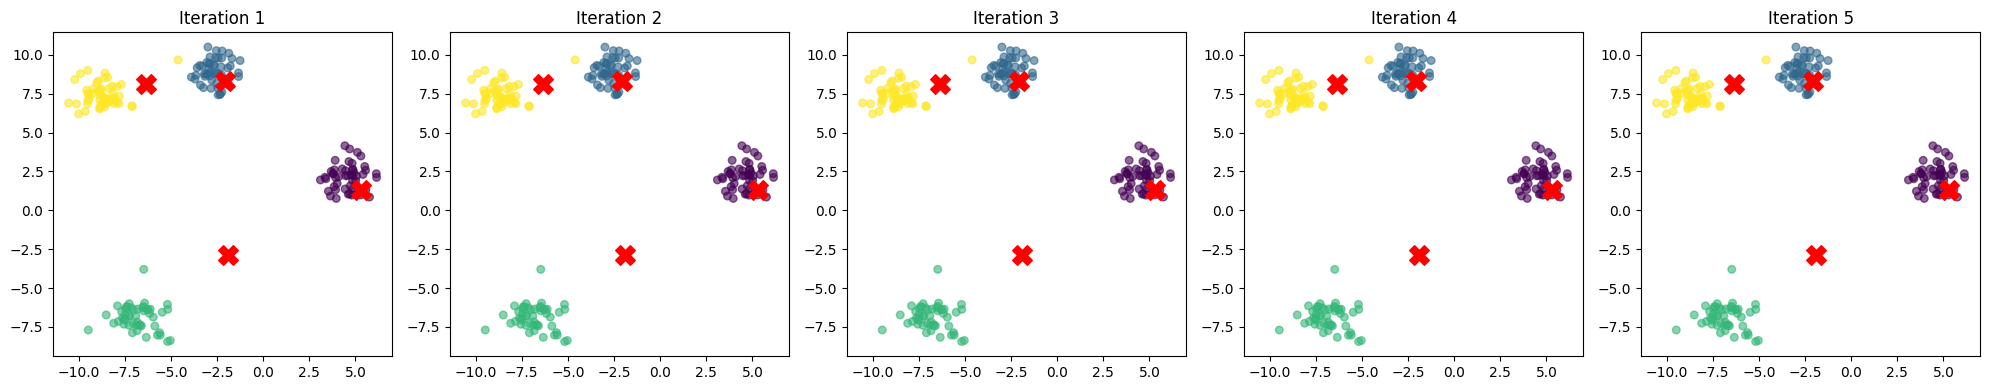

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic 2D data (easy to visualize)
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.8, random_state=42)

# Function to plot the clustering process step by step
def plot_kmeans_progress(X, K=4, max_iters=5):
    # Initialize KMeans with limited iterations
    kmeans = KMeans(n_clusters=K, init="random", n_init=1, max_iter=1, random_state=42)
    
    fig, axes = plt.subplots(1, max_iters, figsize=(20, 4))
    
    for i in range(max_iters):
        kmeans.fit(X)
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_
        
        axes[i].scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=30, alpha=0.6)
        axes[i].scatter(centroids[:,0], centroids[:,1], c="red", marker="X", s=200)
        axes[i].set_title(f"Iteration {i+1}")
    
    plt.tight_layout()
    plt.show()

# Demonstrate step-by-step centroid movement
plot_kmeans_progress(X, K=4, max_iters=5)
